# MNIST - NEURAL NETWORK - 98% ACCURACY

### This was written thanks to the help of https://www.tensorflow.org/tutorials/quickstart/beginner

In [17]:
# import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load in data
mnist = tf.keras.datasets.mnist

# assign test and train sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the data
x_train, x_test = x_train / 255.0, x_test / 255.0

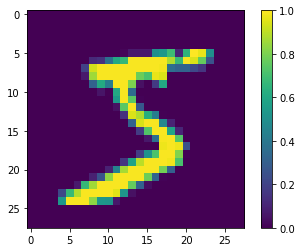

In [7]:
# an example figure
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [28]:
# build a model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [29]:
# model parameters
model.compile(optimizer='Adam', # RMSprop and Momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # cost function
              metrics=['accuracy']) # WANT THE ACC OF THE MODEL

In [30]:
# train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8726
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1034 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0558 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0379 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0312 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [31]:
# accuracy
cost, acc = model.evaluate(x_test,  y_test, verbose=2)
print('Accuracy:', acc)

313/313 - 0s - loss: 0.0890 - accuracy: 0.9790
Accuracy: 0.9789999723434448


In [13]:
# predictions
probability = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
preds = probability.predict(x_test)

In [14]:
# check an example
print(preds[0])

[4.1517156e-05 2.1988424e-07 6.6795743e-05 6.7910934e-03 1.0660585e-07
 2.5357276e-05 3.1147751e-12 9.9249929e-01 7.3810595e-05 5.0186412e-04]


In [18]:
# the result is 1 as expected from softmax
np.sum(preds[0])

1.0

7


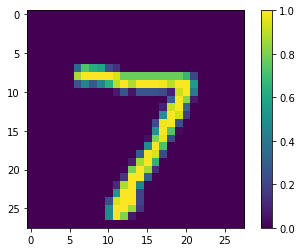

In [22]:
# get the max index
print(np.argmax(preds[0]))

# check the number
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.show()